# Data Preparation and Cleaning

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Setup: import the dataset
dataset on student performance for a portuguese test : attached file student-por.csv

In [2]:
data = pd.read_csv('student-por.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

- there are 33 variables and 650 observations in the dataset
- the response variable seems to be G3 (final result) , while the predictors are : 
    
    -for categorical is absences, health, studytime, 
    
    -for numerical is address, paid, activities/extra-curriculars, wants higher education, reason to choose this school
    
- there are 16 variables identified as int64 by default, and not all are indeed numeric, some are encoded from categorical 
- there are 17 varibales identified as object by default, and they are most likely categorical

# Cleaning the dataset
assigning letter grades and adding new column to the dataset

In [4]:
def alphabet(grade):
        if (i >= 16 and i <= 20):
            return'A'
        elif (i >= 14 and i <= 15):
            return'B'
        elif (i >= 12 and i <= 13):
            return 'C'
        elif (i >= 10 and i <= 11):
            return 'D'
        elif(i >= 0 and i <= 9):
            return'F'

letter_grades = []
for i in data['G3']:
    letter_grades.append(alphabet(i))

#creating a new column in the dataset that contains the letter grade
data['grade'] = letter_grades
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,D
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,D
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,D
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,A
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,F
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,D


	 a:b:c:d:f
ratio:  82 112 154 201 100


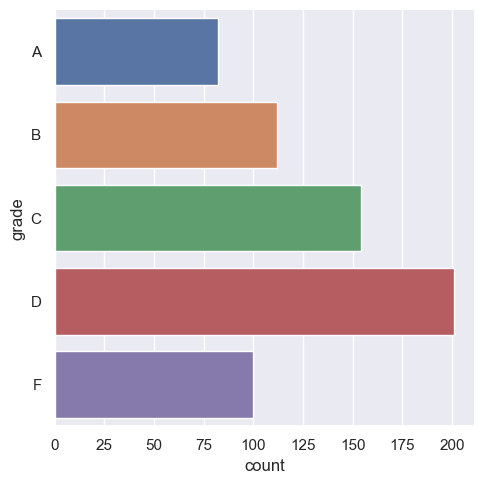

In [5]:
sb.catplot(y='grade',data=data,kind='count',order=['A','B','C','D','F'])

grades = data['grade'].value_counts()
grades_sorted = grades.sort_index()
a,b,c,d,f = grades_sorted
print('\t a:b:c:d:f')
print("ratio: ",a,b,c,d,f)